In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_variable_name(value, namespace):
    for name, val in namespace.items():
        if val is value:
            return name
    return None


def plot(*imgs, lbls=None): # variable number of positional arguments *imgs (The * in this context is the unpacking or "splat" operator)
    fig = plt.figure(figsize=(10,10))
    if lbls is None:
        lbls = ['']*len(imgs)
    dim = np.ceil(np.sqrt(len(imgs))).astype(int) #  calculates the square root of the number of images, which is then used to determine the dimensions of a square grid.
    for i, (im, lbl) in enumerate(zip(imgs, lbls)): # we get both the index and the corresponding image and label
        ax = fig.add_subplot(dim,dim,i+1)
        if len(im.shape) == 2:
            ax.imshow(im, cmap='gray')
        else:
            ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(find_variable_name(im, globals()) if lbl == '' else lbl)
    plt.show()

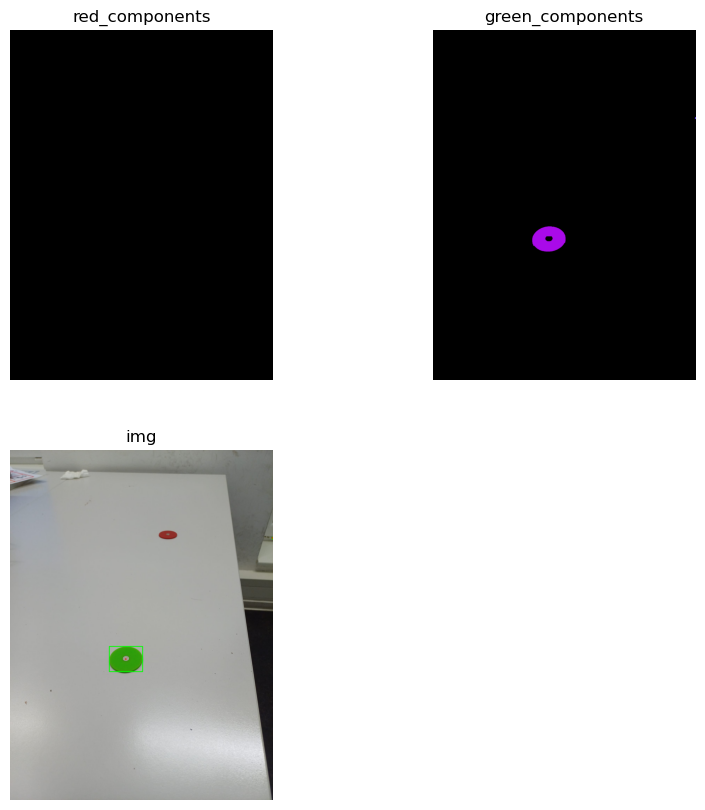

Found 1 red circles with coordinates:
 [[749.5 999.5]]

Found 3 green circles with coordinates:
 [[ 750.10158294  998.16289251]
 [1496.66071429  502.76785714]
 [ 660.48468818 1194.18641107]]


In [5]:
def find_centroids(img, color):
    """Takes an input images and returns a list containing the x (left to right) and y (top to bottom)"""

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if color == "red":
        lower = np.array([60, 40, 150])
        upper = np.array([190, 190, 255]) 

    elif color == "green":
        lower = np.array([10, 40, 35])
        upper = np.array([80, 255, 255])

    mask = cv2.inRange(hsv, lower, upper)
 
    circles = cv2.bitwise_and(img, img, mask = mask) 

    circles_gray = cv2.cvtColor(circles, cv2.COLOR_BGR2GRAY)
    circles_gray = cv2.GaussianBlur(circles_gray, (5,5), 0)
    _, circles_binary_image = cv2.threshold(circles_gray, 100, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    circles_binary_image = cv2.morphologyEx(circles_binary_image, cv2.MORPH_OPEN, kernel, iterations=3)
    circles_binary_image = cv2.morphologyEx(circles_binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

    totalLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(circles_binary_image,8, cv2.CV_32S) # each pixel in the binary image is assigned a label 
                                                                                                        # representing the connected component it belongs to.

    colors = np.random.randint(0,255, size=(totalLabels,3), dtype=np.uint8) # as many random colors as labels
    colors[0] = [0,0,0] # color[0] is the background

    colored_components = colors[labels] # array broadcasting -> we obtain an array where each pixel's label in the original binary 
                                        # image is replaced by the corresponding color from the colors array.


    return centroids, colored_components, totalLabels, stats
    

img = cv2.imread('discs_images/discs_7.jpeg')
centroids_red, red_components, totalLabels_red, stats_red = find_centroids(img, "red")
centroids_green, green_components, totalLabels_green, stats_green = find_centroids(img, "green")

# print(centroids_red)
# print([i for i in range(totalLabels_red)])

for i in range(1, totalLabels_red):
	x = stats_red[i, cv2.CC_STAT_LEFT]
	y = stats_red[i, cv2.CC_STAT_TOP]
	w = stats_red[i, cv2.CC_STAT_WIDTH]
	h = stats_red[i, cv2.CC_STAT_HEIGHT]
	area = stats_red[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids_red[i]
	img=cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
	img=cv2.circle(img, (int(cX), int(cY)), 4, (0, 0, 255), -1)


for i in range(1, totalLabels_green):
	x = stats_green[i, cv2.CC_STAT_LEFT]
	y = stats_green[i, cv2.CC_STAT_TOP]
	w = stats_green[i, cv2.CC_STAT_WIDTH]
	h = stats_green[i, cv2.CC_STAT_HEIGHT]
	area = stats_green[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids_green[i]
	img=cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
	img=cv2.circle(img, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    
plot(red_components, green_components, img)
print(f"Found {len(centroids_red)} red circles with coordinates:\n {centroids_red}\n".format())

print(f"Found {len(centroids_green)} green circles with coordinates:\n {centroids_green}".format())
